In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart = pd.read_csv('/content/heart.csv')

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

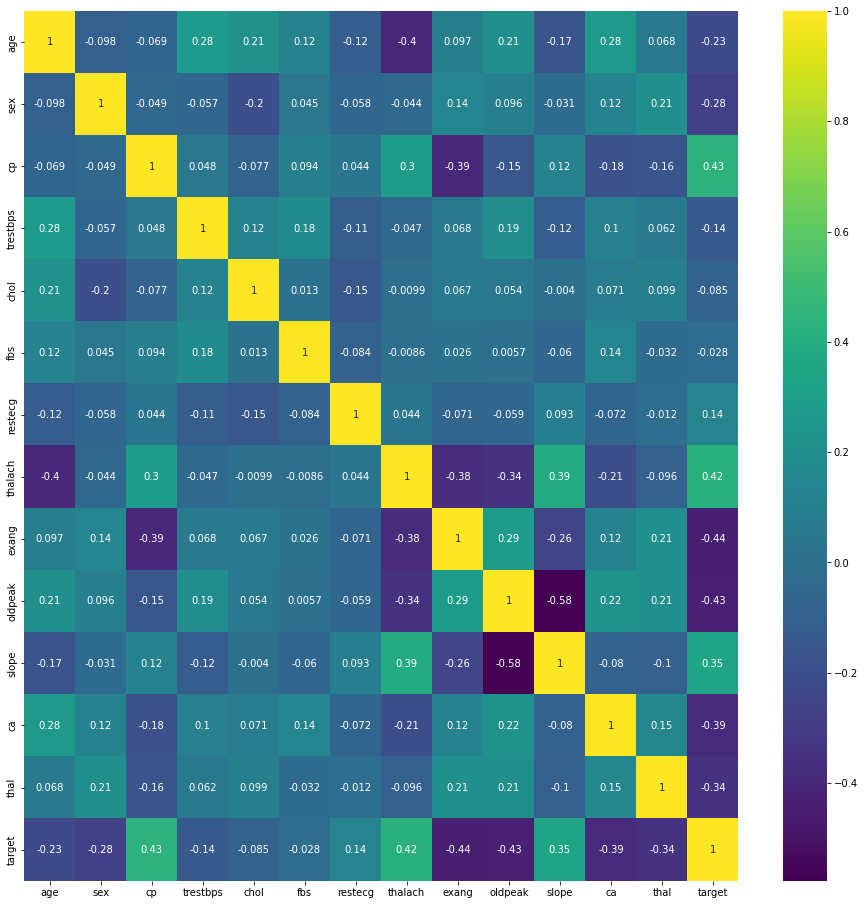

In [ ]:
plt.figure(figsize = (16,16))
sns.heatmap(heart.corr(), annot = True, cmap = 'viridis')

In [ ]:
#sns.pairplot(heart)

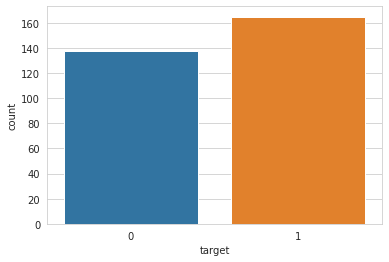

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = heart)
plt.show()

In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
dataset = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs','slope', 'ca','thal','restecg','exang'])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,63,145,233,150,2.3,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
col_to_scale = ['age','trestbps','chol','thalach','oldpeak']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset[col_to_scale] = sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
X = dataset.drop('target', axis = 1)
y = dataset['target']

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
  k_nearest = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(k_nearest,X,y,cv =10)
  knn.append(score.mean())

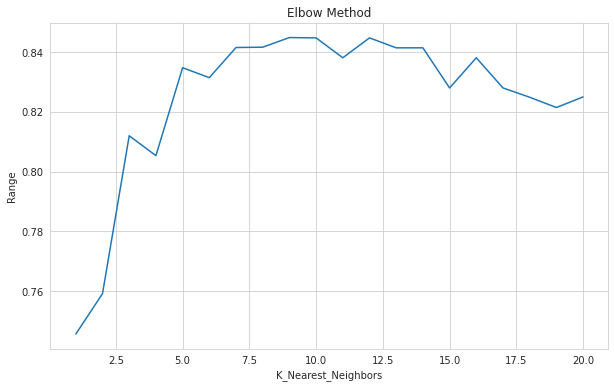

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,21), knn)
plt.title("Elbow Method")
plt.xlabel('K_Nearest_Neighbors')
plt.ylabel("Range")
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8571428571428571

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=10)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
rfc_pred = rfc_model.predict(X_test)

In [ ]:
accuracy_score(y_test,rfc_pred)

0.8351648351648352